# Shifting then Tilting HG(0,0)

***
The effect of a tilt to an already misaligned beam of fundamental mode:

$
	\sum_{n,m} u_{nm}(x,y,0)= u_{00(tilt)}(x,y,0)+ \frac{a}{w_0}u_{10(tilt)}(x,y,0) \; .
$

The first term is verified to be

$
	u_{00 (tilt)} \approx u_{00}(x,y,0) + i  \frac{\pi w_{0} \alpha}{\lambda}u_{10} \; .
$

The second term approximates to

$
		\frac{a}{w_0} u_{tilt(1,0)}(x,y,0) 			 
			\approx  
			\frac{a}{w_0} 
			u_{10} 
			 \left[
			1 + i \frac{2 \pi x \alpha}{\lambda} \right] \;.
$

***
Therefore:

$
		u(x,y,0)=
			\left[
				1+
				i \frac{ \pi a \alpha}{ \lambda}
			\right]
			u_{00}
			+
			\left[
				i  \frac{\pi w_{0} \alpha}{\lambda}
			+
			\frac{a}{w_{0}}
			\right]			
			u_{10}
			+
			i  
				\frac{\sqrt{2} \pi a \alpha}{ \lambda}
			u_{20}	.
$





In [1]:
import PauLisa as pl, numpy as np, matplotlib.pyplot as plt, cmath as cm
from scipy import integrate
from mpmath import quadgl

In [2]:
#Redefining and naming initial parameters
high_res_plane = pl.Plane(-6e-3,7e-3,1000,-1e-3,1e-3,3) #just used to calculate peak, higher precision
plane = pl.Plane(-2e-3,2e-3,1000,-2e-3,2e-3,1000)
params = pl.Params(wavelength=1.064e-06, w0=1e-3, z0=0)
a = 100e-6 #shift
alpha = 500e-6 #tilt angle

#wavelength
lam = params.wavelength #wavelength
w0 = params.w0 #spot size
E0 = 1   #E field

#scales of each mode
c00_ref = 1
c00 = (1+ (np.pi * a * alpha/ lam)*1j)
c10 = ((a/w0)+ (np.pi*w0*alpha/lam)*1j)
c20 = (np.sqrt(2)*np.pi*a*alpha/lam)*1j


print(c00,c10,c20)

#create modes received and reference (rec and ref)
modes_rec = pl.modes((0,0,c00),(1,0,c10),(2,0,c20))
modes_ref = pl.modes((0,0,c00_ref))


#calculate amp. and phase
#result_rec = pl.calculate(params, plane, modes_rec, z=0)
#result_ref = pl.calculate(params,plane,modes_ref, z=0)



(1+0.14763123372132486j) (0.1+1.4763123372132485j) 0.20878209295856984j


TypeError: modes() takes 1 positional argument but 3 were given

\begin{equation}
U_{00(LO)}^*(x,y,z) U_{nm(RX)}(x,y,z)
\end{equation}

In [3]:
f = lambda y, x: (pl.amplitude(params,x,y,0,modes_rec))*np.conjugate((pl.amplitude(params,x,y,0,modes_ref)))

\begin{equation}
C_{nmn'm'}^{R} = \int_{0}^{\infty} dx\int_{-\infty}^{\infty} dy \; U_{00(LO)}^*(x,y,z) U_{nm(RX)}(x,y,z)
\end{equation}

In [4]:
cr = quadgl(f, [plane.ymin,plane.ymax],[0,plane.xmax])

\begin{equation}
C_{nmn'm'}^{L} = \int_{-\infty}^{0} dx\int_{-\infty}^{\infty} dy \; U_{00(LO)}^*(x,y,z) U_{nm(RX)}(x,y,z)
\end{equation}

In [6]:
cl = quadgl(f, [plane.ymin,plane.ymax],[plane.xmin,0])
print(cr,cl)
print(cr-cl)

(0.539814978388262 + 0.662455782037362j) (0.460058340656676 - 0.515001300540509j)
(0.0797566377315854 + 1.17745708257787j)


\begin{equation}
	\phi_R = 
		arg (C_{nmn'm'}^{R})
 \end{equation}

In [7]:
phi_r = cm.phase(cr)
print(phi_r)

0.8870541812137551


\begin{equation}
	\phi_L = 
		arg (C_{nmn'm'}^{L})
 \end{equation}

In [8]:
phi_l = cm.phase(cl)
print(phi_l)

-0.8416869458653942


\begin{equation}
    \Delta \phi = \frac{1}{2}(\phi_R - \phi_L)
\end{equation}

In [9]:
print (phi_r-phi_l)

1.7287411270791493


In [12]:
def integ(alpha_lin):
    
    sol = [0]*len(alpha_lin)
    
    for i in range (len(alpha_lin)):
        c00 = (1+ (np.pi * a * alpha_lin[i]/ lam)*1j)
        c10 = ((a/w0)+ (np.pi*w0*alpha_lin[i]/lam)*1j)
        c20 = (np.sqrt(2)*np.pi*a*alpha_lin[i]/lam)*1j

        #create modes received and reference (rec and ref)
        modes_rec = pl.modes((0,0,c00),(1,0,c10),(2,0,c20))
        modes_ref = pl.modes((0,0,c00_ref))

        f = lambda y, x: (pl.amplitude(params,x,y,0,modes_rec))*np.conjugate((pl.amplitude(params,x,y,0,modes_ref)))    
        cr = quadgl(f, [plane.ymin,plane.ymax],[0,plane.xmax])
        cl = quadgl(f, [plane.ymin,plane.ymax],[plane.xmin,0])

        phi_r = cm.phase(cr)
        phi_l = cm.phase(cl)
        
        sol[i] = 0.5*(phi_r-phi_l)
        
    return (sol)       

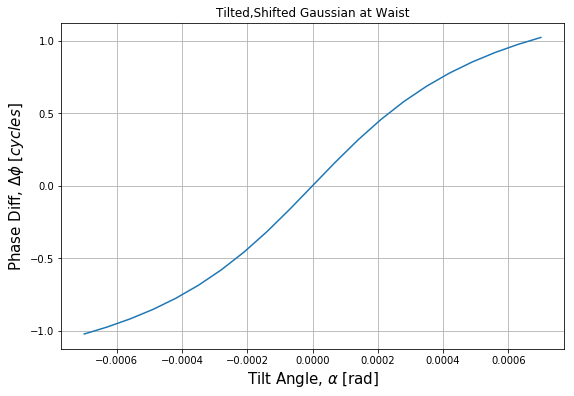

In [13]:
alpha_lin = np.linspace(-700e-6,700e-6,21)

plt.figure(figsize=(9,6))
plt.plot(alpha_lin, integ(alpha_lin))

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + 'rad]', fontsize=15) 
plt.ylabel(r'Phase Diff, $\Delta \phi\;[' +  'rad]$', fontsize=15) 
plt.title(r'Tilted,Shifted Gaussian at Waist') 

plt.grid()

\begin{equation}
    u_{rec} = u_{00} + \frac{i \pi w_0 \alpha}{\lambda} u_{10}
\end{equation}

In [11]:
def integ_tilt_only(alpha_lin,gapsize):
    
    sol = [0]*len(alpha_lin)
    
    for i in range (len(alpha_lin)):
        c00 = 1
        c10 = ((np.pi*w0*alpha_lin[i]/lam)*1j)

        #create modes received and reference (rec and ref)
        modes_rec = pl.modes((0,0,c00),(1,0,c10))
        modes_ref = pl.modes((0,0,c00_ref))

        f = lambda y, x: (pl.amplitude(params,x,y,0,modes_rec))*np.conjugate((pl.amplitude(params,x,y,0,modes_ref)))    
        
        #with gap 1/1000 plane width
        cr = quadgl(f, [plane.ymin,plane.ymax],[plane.xmax*gapsize,plane.xmax])
        cl = quadgl(f, [plane.ymin,plane.ymax],[plane.xmin,plane.xmin*gapsize])
        
        #args for phi_r and phi_l
        phi_r = cm.phase(cr)
        phi_l = cm.phase(cl)
        
        #result in cycles
        sol[i] = 0.5*(phi_r-phi_l)/(2*np.pi)
        
    return (sol) 

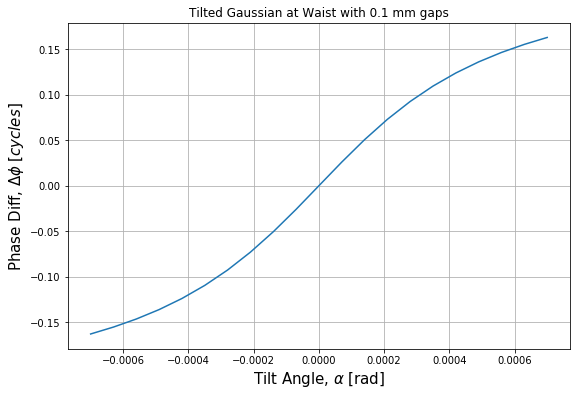

In [12]:
alpha_lin = np.linspace(-700e-6,700e-6,21)

plt.figure(figsize=(9,6))
plt.plot(alpha_lin, integ_tilt_only(alpha_lin,0.1e-3))

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + 'rad]', fontsize=15) 
plt.ylabel(r'Phase Diff, $\Delta \phi\;[' +  'cycles]$', fontsize=15) 
plt.title(r'Tilted Gaussian at Waist with 0.1 mm gaps') 

plt.grid()

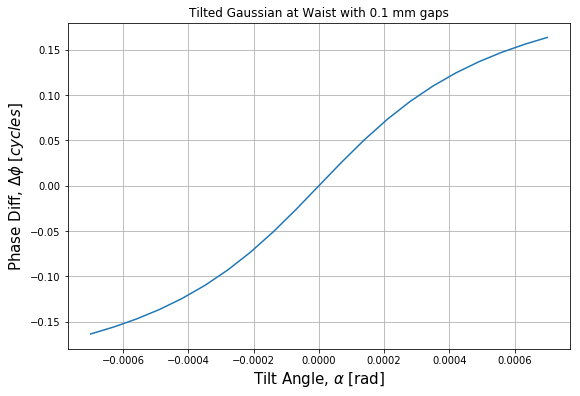

In [13]:
alpha_lin = np.linspace(-700e-6,700e-6,21)

plt.figure(figsize=(9,6))
plt.plot(alpha_lin, integ_tilt_only(alpha_lin,.1e-2))

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + 'rad]', fontsize=15) 
plt.ylabel(r'Phase Diff, $\Delta \phi\;[' +  'cycles]$', fontsize=15) 
plt.title(r'Tilted Gaussian at Waist with 0.1 mm gaps') 

plt.grid()

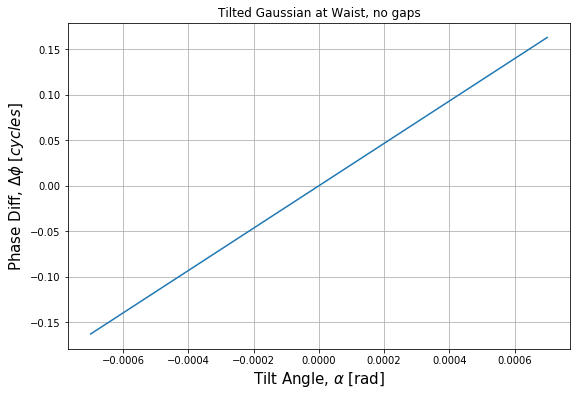

In [14]:
alpha_lin = np.linspace(-700e-6,700e-6,3)

plt.figure(figsize=(9,6))
plt.plot(alpha_lin, integ_tilt_only(alpha_lin,0))

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + 'rad]', fontsize=15) 
plt.ylabel(r'Phase Diff, $\Delta \phi\;[' +  'cycles]$', fontsize=15) 
plt.title(r'Tilted Gaussian at Waist, no gaps') 

plt.grid()